In [54]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np

import math

In [55]:
filterbank = []
# frequencies = (math.pi/2) * math.sqrt(2)**(-np.random.randint(0,5,(64,3)))
# thetas = []

0.3 0.2 0.0
(57, 57)
0.3 0.8 0.0
(15, 15)
0.3 0.6 0.0
(21, 21)
0.3 0.4 0.0
(29, 29)
0.45 0.2 0.0
(39, 39)
0.45 0.8 0.0
(11, 11)
0.45 0.6 0.0
(15, 15)
0.45 0.4 0.0
(21, 21)
0.6 0.2 0.0
(29, 29)
0.6 0.8 0.0
(9, 9)
0.6 0.6 0.0
(11, 11)
0.6 0.4 0.0
(15, 15)
0.3 0.2 0.196349375
(55, 55)
0.3 0.8 0.196349375
(15, 15)
0.3 0.6 0.196349375
(19, 19)
0.3 0.4 0.196349375
(29, 29)
0.45 0.2 0.196349375
(37, 37)
0.45 0.8 0.196349375
(11, 11)
0.45 0.6 0.196349375
(13, 13)
0.45 0.4 0.196349375
(19, 19)
0.6 0.2 0.196349375
(29, 29)
0.6 0.8 0.196349375
(9, 9)
0.6 0.6 0.196349375
(11, 11)
0.6 0.4 0.196349375
(15, 15)
0.3 0.2 0.39269875
(53, 53)
0.3 0.8 0.39269875
(15, 15)
0.3 0.6 0.39269875
(19, 19)
0.3 0.4 0.39269875
(27, 27)
0.45 0.2 0.39269875
(35, 35)
0.45 0.8 0.39269875
(11, 11)
0.45 0.6 0.39269875
(13, 13)
0.45 0.4 0.39269875
(19, 19)
0.6 0.2 0.39269875
(27, 27)
0.6 0.8 0.39269875
(9, 9)
0.6 0.6 0.39269875
(11, 11)
0.6 0.4 0.39269875
(15, 15)
0.3 0.2 0.5890481249999999
(47, 47)
0.3 0.8 0.589048124999

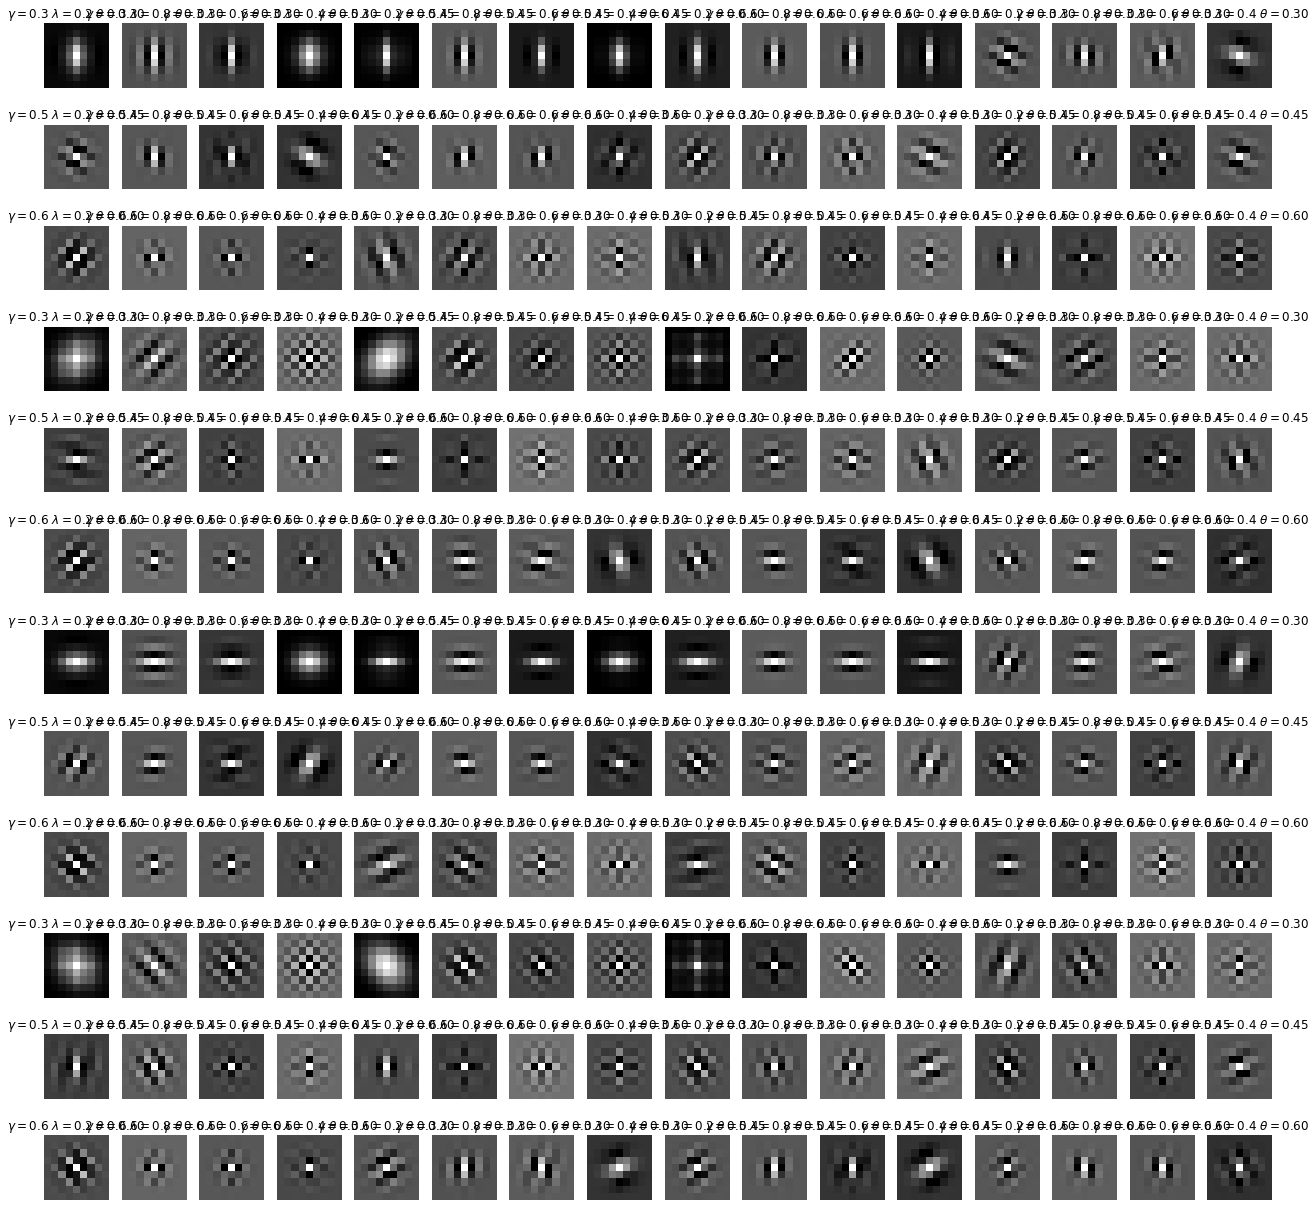

In [56]:
fig = plt.subplots(12, 16, figsize=(22,22))
filterbank = []
cnt = 0
for angle in np.linspace(0.0, 3.14159, 16, endpoint=False):
  for freq in [0.3, 0.45, 0.6]:
    for band in [0.2, 0.8, 0.6, 0.4]:
      print(freq, band, angle)
      cnt = cnt + 1
      gk = gabor_kernel(frequency=freq, bandwidth=band, theta=angle)
      plt.subplot(12, 16, cnt)
      gf = resize(gk.real,(9,9),anti_aliasing=False)
      gf = gf - np.min(gf)
      gf = gf/np.max(gf)
      gf = gf * 0.6
      gf = gf - 0.3
      filterbank.append(gf)
      plt.imshow(gf, cmap='gray')
      print(gk.real.shape)
      # plt.colorbar()
      plt.axis('off')
      plt.title("$\\gamma=${0:0.1f} $\\lambda=${1:0.1f} $\\theta=${0:0.2f}".format(freq,band,angle))
plt.show()

In [57]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [58]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(64, (9, 9), strides=(2, 2),activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = 10, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        15616     
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 128)         512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 128)        

In [59]:
np.array(filterbank).shape

(192, 9, 9)

In [60]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

In [61]:
wshape

(9, 9, 3, 64)

In [62]:
gabor_filters = np.empty(wshape, dtype='float32')
for kernel_index in range(wshape[3]):
    for channel_index in range(3):
        gabor_filters[:,:,channel_index, kernel_index] = filterbank[kernel_index+channel_index]
# for k in range(0,wshape[3],3):
#   gabor_filters[:,:,0,k] = filterbank[k]
#   gabor_filters[:,:,1,k] = filterbank[k]
#   gabor_filters[:,:,2,k] = filterbank[k]


In [63]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 27s 55ms/step - loss: 0.2755 - accuracy: 0.3539 - val_loss: 0.2463 - val_accuracy: 0.4439
Epoch 2/1000
500/500 [==============================] - 27s 54ms/step - loss: 0.2283 - accuracy: 0.4738 - val_loss: 0.3609 - val_accuracy: 0.3188
Epoch 3/1000
500/500 [==============================] - 25s 51ms/step - loss: 0.2113 - accuracy: 0.5238 - val_loss: 0.2996 - val_accuracy: 0.3406
Epoch 4/1000
500/500 [==============================] - 26s 52ms/step - loss: 0.2013 - accuracy: 0.5511 - val_loss: 0.2925 - val_accuracy: 0.3903
Epoch 5/1000
500/500 [==============================] - 25s 51ms/step - loss: 0.1915 - accuracy: 0.5769 - val_loss: 0.1929 - val_accuracy: 0.5545
Epoch 6/1000
500/500 [==============================] - 26s 51ms/step - loss: 0.1835 - accuracy: 0.5992 - val_loss: 0.1926 - val_accuracy: 0.5648
Epoch 7/1000
500/500 [==============================] - 25s 51ms/step - loss: 0.1774 - accuracy: 0.6123 - val_loss: 0.2269 -

500/500 [==============================] - 28s 56ms/step - loss: 0.0889 - accuracy: 0.8226 - val_loss: 0.1153 - val_accuracy: 0.7667
Epoch 107/1000
500/500 [==============================] - 28s 56ms/step - loss: 0.0890 - accuracy: 0.8223 - val_loss: 0.1154 - val_accuracy: 0.7657
Epoch 108/1000
500/500 [==============================] - 28s 56ms/step - loss: 0.0881 - accuracy: 0.8233 - val_loss: 0.1151 - val_accuracy: 0.7663
Epoch 109/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.0881 - accuracy: 0.8234 - val_loss: 0.1154 - val_accuracy: 0.7656
Epoch 110/1000
500/500 [==============================] - 29s 57ms/step - loss: 0.0888 - accuracy: 0.8245 - val_loss: 0.1154 - val_accuracy: 0.7658
Epoch 111/1000
500/500 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.8266
Epoch 00111: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
500/500 [==============================] - 30s 59ms/step - loss: 0.0884 - accuracy: 0.8266 - v

Epoch 156/1000
500/500 [==============================] - 30s 60ms/step - loss: 0.0870 - accuracy: 0.8282 - val_loss: 0.1150 - val_accuracy: 0.7679
Epoch 157/1000
500/500 [==============================] - 31s 63ms/step - loss: 0.0884 - accuracy: 0.8243 - val_loss: 0.1150 - val_accuracy: 0.7683
Epoch 158/1000
500/500 [==============================] - 31s 63ms/step - loss: 0.0878 - accuracy: 0.8243 - val_loss: 0.1150 - val_accuracy: 0.7682
Epoch 159/1000
500/500 [==============================] - 33s 66ms/step - loss: 0.0870 - accuracy: 0.8291 - val_loss: 0.1150 - val_accuracy: 0.7680
Epoch 160/1000
500/500 [==============================] - 30s 59ms/step - loss: 0.0882 - accuracy: 0.8263 - val_loss: 0.1150 - val_accuracy: 0.7683
Epoch 161/1000
500/500 [==============================] - 30s 61ms/step - loss: 0.0880 - accuracy: 0.8241 - val_loss: 0.1149 - val_accuracy: 0.7682
Epoch 162/1000
500/500 [==============================] - 31s 62ms/step - loss: 0.0879 - accuracy: 0.8241 - val_

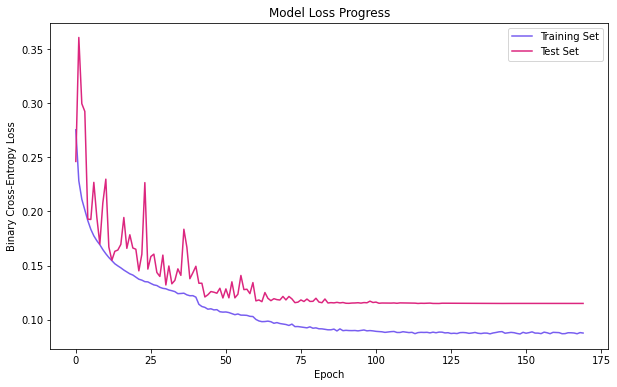

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('cnn-gabor.cifar10.loss-2.png', dpi=350, bbox_inches='tight')
plt.show()

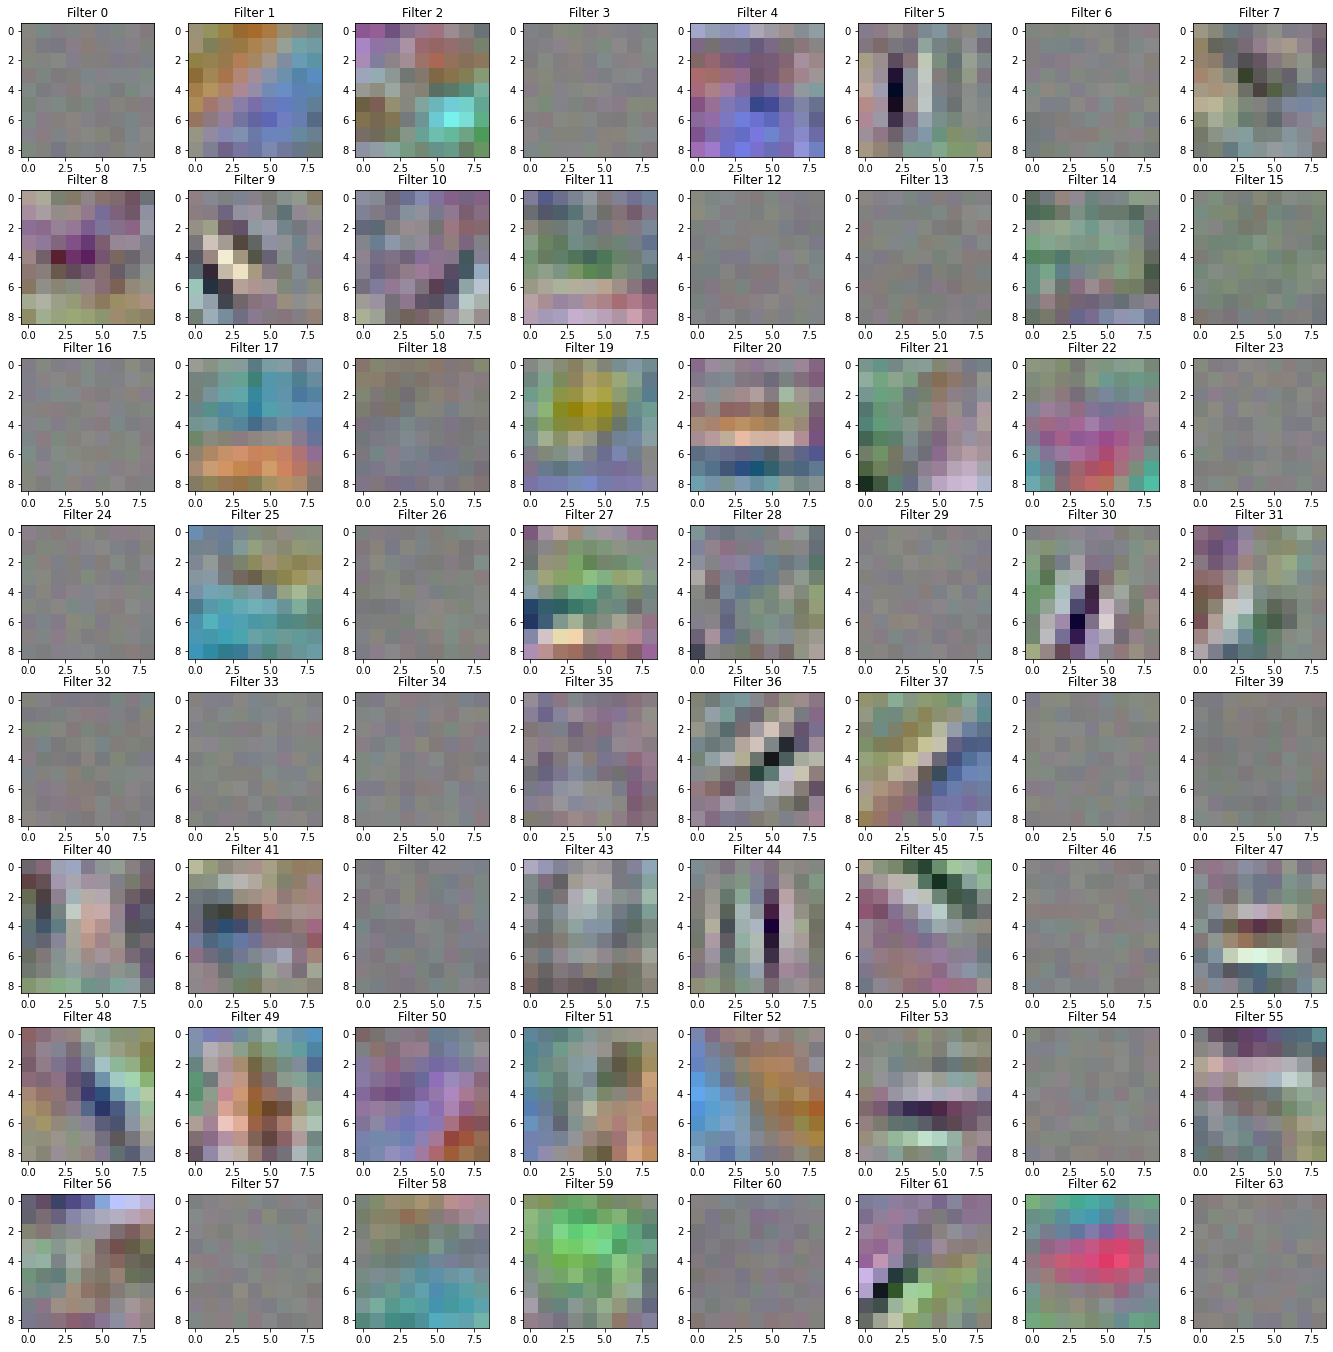

In [65]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("cnn-gabor.full.filters-2.png", bbox_inches='tight', dpi=350)

-0.5783284 0.5282229


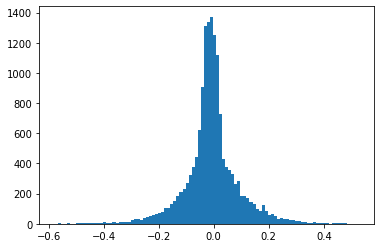

In [66]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))